 #  Import Necessary libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeRegressor

#  Import Data

In [3]:
company_Data=pd.read_csv("Company_Data.csv")

In [4]:
company_Data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
company_Data.Sales.nlargest(20).unique()

array([16.27, 15.63, 14.9 , 14.37, 13.91, 13.55, 13.44, 13.39, 13.36,
       13.28, 13.14, 12.98, 12.85, 12.66, 12.61, 12.57, 12.53, 12.49])

In [6]:
company_Data.Sales.median()

7.49

##  Data Understanding

In [7]:
company_Data.shape

(400, 11)

In [8]:
company_Data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [9]:
company_Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
company_Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [12]:
company_Data_1=company_Data.copy()

### Correlation Matrix and Heatmap

In [13]:
company_Data_1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [14]:
import seaborn as sns

<AxesSubplot:>

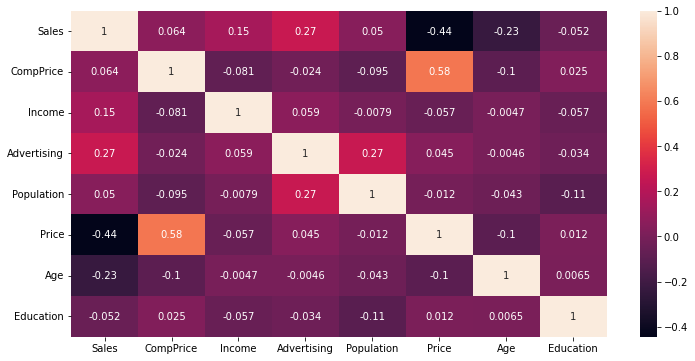

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(company_Data_1.corr(),annot=True)

## Data Preprocessing :

In [16]:
company_Data_1['ShelveLoc']=company_Data_1['ShelveLoc'].astype('category')
company_Data_1['Urban']=company_Data_1['Urban'].astype('category')
company_Data_1['US']=company_Data_1['US'].astype('category')

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le_encoder = LabelEncoder()
company_Data_1['ShelveLoc'] = le_encoder.fit_transform(company_Data_1['ShelveLoc'])
company_Data_1['Urban'] = le_encoder.fit_transform(company_Data_1['Urban'])
company_Data_1['US'] = le_encoder.fit_transform(company_Data_1['US'])

In [19]:
company_Data_1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [20]:
company_Data_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [21]:
x = company_Data_1.drop('Sales',axis=1)
y = company_Data_1[['Sales']]

In [22]:
x.shape,y.shape

((400, 10), (400, 1))

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [24]:
x_train.shape,y_train.shape

((268, 10), (268, 1))

In [25]:
x_test.shape,y_test.shape

((132, 10), (132, 1))

In [26]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
317,142,30,0,472,136,1,80,15,0,0
344,138,80,0,108,126,1,70,13,0,1
9,132,113,0,131,124,2,76,17,0,1
120,128,105,11,249,131,2,63,13,1,1
336,138,35,6,60,143,0,28,18,1,0
...,...,...,...,...,...,...,...,...,...,...
97,161,82,5,287,129,0,33,16,1,1
219,116,79,19,359,116,1,58,17,1,1
202,121,78,4,413,130,0,46,10,0,1
293,123,84,0,74,89,1,59,10,1,0


## Model  Building||  Training

In [27]:
dt_model =DecisionTreeRegressor(max_depth = 3,criterion='mse')

In [28]:
dt_model.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3)

###  Plot the Tree

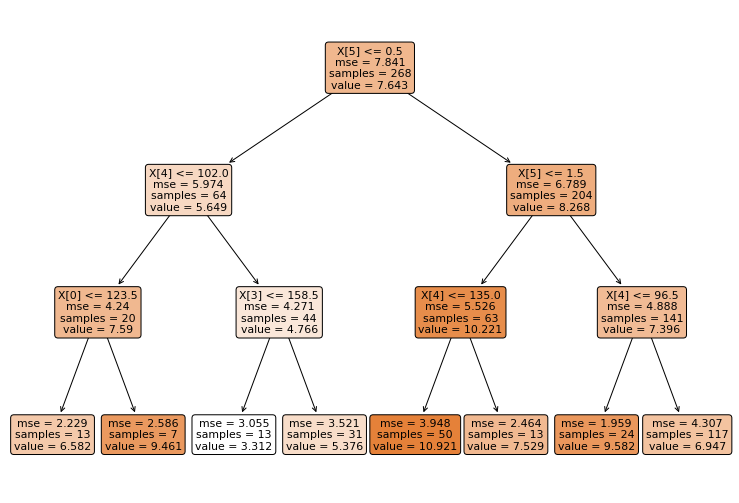

In [29]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = dt_model,filled=True,rounded=True)
plt.show()

### Model Evaluation 

### Training data

In [30]:
y_pred_train = dt_model.predict(x_train)

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [32]:
print(' R2_score\n : ',r2_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Mean_Absolute_error:\n',mean_absolute_error(y_train,y_pred_train))
print('-------------------------------------------')
print('Mean_Squared_error:\n',mean_squared_error(y_train,y_pred_train))
print('-------------------------------------------')
print('Mean_Absolute_Percentage_error:\n',mean_absolute_percentage_error(y_train,y_pred_train))

 R2_score
 :  0.5354056895711299
-------------------------------------------
Mean_Absolute_error:
 1.5553019068517744
-------------------------------------------
Mean_Squared_error:
 3.643101570013059
-------------------------------------------
Mean_Absolute_Percentage_error:
 0.43550128164281005


### Model Testing

In [33]:
y_test_pred = dt_model.predict(x_test)

In [34]:
print('Mean_Absolute_error:\n',mean_absolute_error(y_test,y_test_pred))
print('-------------------------------------------')
print('Mean_Squared_error:\n',mean_squared_error(y_test,y_test_pred))
print('-------------------------------------------')
print('Mean_Absolute_Percentage_error:\n',mean_absolute_percentage_error(y_test,y_test_pred))

Mean_Absolute_error:
 1.760729497473852
-------------------------------------------
Mean_Squared_error:
 4.784668985232047
-------------------------------------------
Mean_Absolute_Percentage_error:
 237033861506611.75


##  Getting Optimal values for Hyperparameter

### 1.GridSearchCV :

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_search_cv = GridSearchCV(estimator = dt_model,param_grid = {'criterion':['mse','poisson','friedman_mse','mae'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'mse', 'max_depth': 7}
0.44105162175868085


### 2. Accuracy Score Plot

In [37]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeRegressor(max_depth = depth)
    dt_model.fit(x_train,y_train)
    train_accuracy.append(dt_model.score(x_train,y_train))
    test_accuracy.append(dt_model.score(x_test,y_test))

In [38]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.159096,0.124059
1,2,0.376613,0.307836
2,3,0.535406,0.406053
3,4,0.638581,0.363117
4,5,0.769368,0.384835


Text(0, 0.5, 'performance')

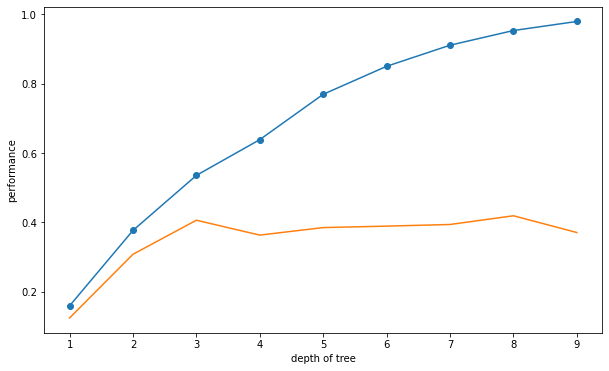

In [39]:
plt.figure(figsize=(10,6))
plt.plot(frame["max_depth"],frame["train_acc"],marker='o')
plt.plot(frame["max_depth"],frame["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

### Observation:

####  This gives  'criterion'=   'mse', 'max_depth'= 7

### Building the model with the outcome of this  Hyper-Parameter analysis

In [40]:
dt_model_1 =DecisionTreeRegressor(max_depth = 7,criterion='mse')

In [41]:
dt_model_1.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=7)

### Plot the Tree

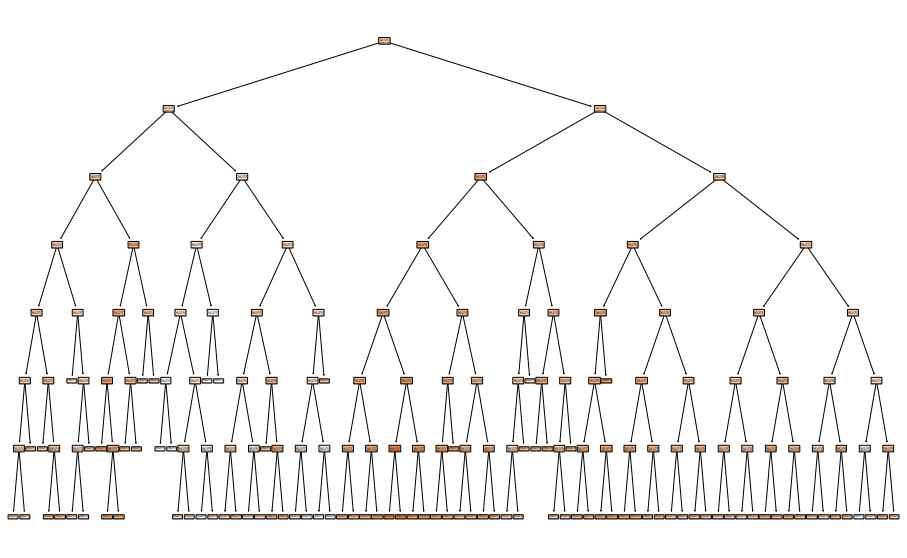

In [42]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(16,10))
plot_tree(decision_tree = dt_model_1,filled=True,rounded=True)
plt.show()

### Model Prediction|| Model Evaluation:

### Training Data

In [43]:
y_pred_train_1 = dt_model_1.predict(x_train)

In [44]:
print(' R2_score\n : ',r2_score(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Mean_Absolute_error:\n',mean_absolute_error(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Mean_Squared_error:\n',mean_squared_error(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Mean_Absolute_Percentage_error:\n',mean_absolute_percentage_error(y_train,y_pred_train_1))

 R2_score
 :  0.9109750488364055
-------------------------------------------
Mean_Absolute_error:
 0.5585178586285011
-------------------------------------------
Mean_Squared_error:
 0.6980863348391819
-------------------------------------------
Mean_Absolute_Percentage_error:
 0.08792473991261288


### Model Testing || Evaluation

In [45]:
y_test_pred_1 = dt_model_1.predict(x_test)

In [46]:
print('Mean_Absolute_error:\n',mean_absolute_error(y_test,y_test_pred_1))
print('-------------------------------------------')
print('Mean_Squared_error:\n',mean_squared_error(y_test,y_test_pred_1))
print('-------------------------------------------')
print('Mean_Absolute_Percentage_error:\n',mean_absolute_percentage_error(y_test,y_test_pred_1))

Mean_Absolute_error:
 1.8286553804488588
-------------------------------------------
Mean_Squared_error:
 5.223148105918114
-------------------------------------------
Mean_Absolute_Percentage_error:
 145115987993049.62


# 2. Lets  try to build the model with classification also

###  Data Preprocessing

In [47]:
company_Data_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [48]:
company_Data_2=company_Data_1.copy()

In [49]:
company_Data_2.Sales.mean()

7.496325

In [50]:
company_Data_2.Sales.unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [51]:
company_Data_2.Sales.nlargest(20)

376    16.27
316    15.63
25     14.90
367    14.37
18     13.91
30     13.55
352    13.44
68     13.39
357    13.36
193    13.28
232    13.14
272    12.98
384    12.85
294    12.66
73     12.61
348    12.57
395    12.57
158    12.53
98     12.49
171    12.49
Name: Sales, dtype: float64

###   Setting up the criteria using :Apply function

In [52]:
company_Data_2['Sales_Criteria'] =company_Data_2['Sales'].apply(lambda x: "Good" if x>= 9.32 else "Average" if x<9.32 and x>=7.49 else "Low" )

### DataFrame with newly added criteria column

In [53]:
company_Data_2.head(30)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Criteria
0,9.50,138,73,11,276,120,0,42,17,1,1,Good
1,11.22,111,48,16,260,83,1,65,10,1,1,Good
2,10.06,113,35,10,269,80,2,59,12,1,1,Good
3,7.40,117,100,4,466,97,2,55,14,1,1,Low
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
5,10.81,124,113,13,501,72,0,78,16,0,1,Good
6,6.63,115,105,0,45,108,2,71,15,1,0,Low
7,11.85,136,81,15,425,120,1,67,10,1,1,Good
8,6.54,132,110,0,108,124,2,76,10,0,0,Low
9,4.69,132,113,0,131,124,2,76,17,0,1,Low


In [54]:
company_Data_2.shape

(400, 12)

In [55]:
company_Data_2.dtypes

Sales             float64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
ShelveLoc           int32
Age                 int64
Education           int64
Urban               int32
US                  int32
Sales_Criteria     object
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le_encoder = LabelEncoder()

In [58]:
company_Data_2['Sales_Criteria'] = le_encoder.fit_transform(company_Data_2['Sales_Criteria'])

In [59]:
company_Data_2.dtypes

Sales             float64
CompPrice           int64
Income              int64
Advertising         int64
Population          int64
Price               int64
ShelveLoc           int32
Age                 int64
Education           int64
Urban               int32
US                  int32
Sales_Criteria      int32
dtype: object

In [60]:
company_Data_2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Criteria
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0,2


In [61]:
X =company_Data_2.drop(['Sales','Sales_Criteria'],axis=1)
y =company_Data_2[['Sales_Criteria']]

In [62]:
X.shape,y.shape

((400, 10), (400, 1))

####  Train_Test_Split

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=None)

In [64]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [65]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

### Model Building ||  Model Training

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth = 3,criterion='gini')

In [67]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

###  Plot the Tree

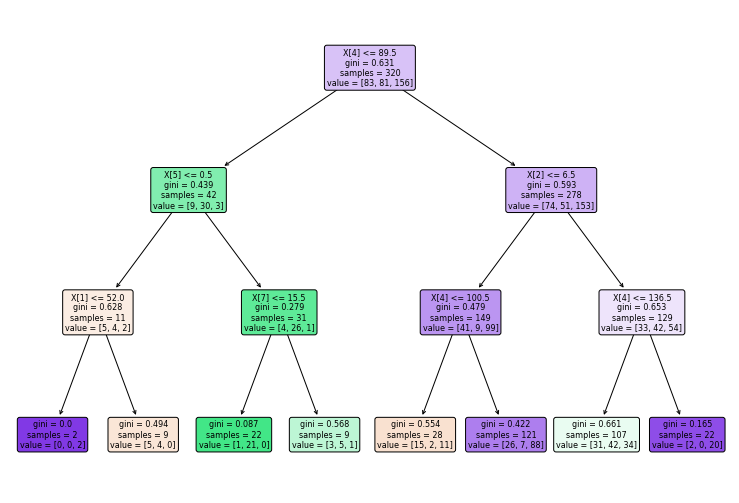

In [68]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = dt_model,filled=True,rounded=True)
plt.show()

### Prediction

In [69]:
y_pred_train = dt_model.predict(X_train)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Evaluation

In [71]:
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.61875
-------------------------------------------
Confusion Matrix:
 [[ 20  35  28]
 [  6  68   7]
 [ 11  35 110]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.24      0.33        83
           1       0.49      0.84      0.62        81
           2       0.76      0.71      0.73       156

    accuracy                           0.62       320
   macro avg       0.60      0.60      0.56       320
weighted avg       0.63      0.62      0.60       320



#### Test data

In [72]:
y_pred_test = dt_model.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred_test)

0.6125

###  Evaluation

In [74]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.6125
-------------------------------------------
Confusion Matrix:
 [[ 2  7  7]
 [ 2 16  3]
 [ 2 10 31]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.12      0.18        16
           1       0.48      0.76      0.59        21
           2       0.76      0.72      0.74        43

    accuracy                           0.61        80
   macro avg       0.52      0.54      0.50        80
weighted avg       0.60      0.61      0.59        80



##  Getting optimal values of the Hyper parameters(Hyper parameters tweaking)

### 1. GridSearchCV:

In [86]:
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(estimator = dt_model,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[6,7,8,9,10],'max_leaf_nodes':[1,2,3,4]},
                              cv=5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 3}
0.5675000000000001


### 2. Accuracy score plot:

In [87]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth = depth)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))

In [88]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'test_acc':test_accuracy})
frame.head()

,max_depth,train_acc,test_acc
0,1,0.571875,0.5625
1,2,0.575000,0.5750
2,3,0.618750,0.6125
3,4,0.690625,0.6125
4,5,0.740625,0.5875


Text(0, 0.5, 'performance')

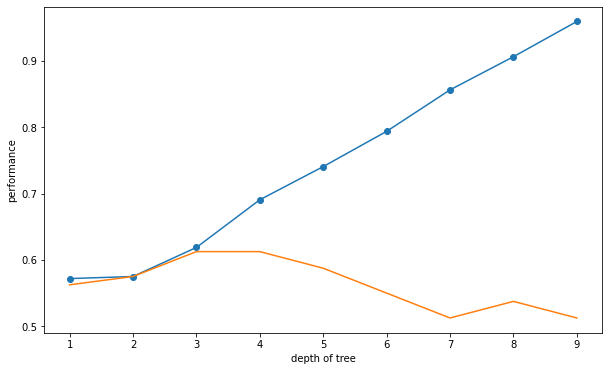

In [89]:
plt.figure(figsize=(10,6))
plt.plot(frame["max_depth"],frame["train_acc"],marker='o')
plt.plot(frame["max_depth"],frame["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

#### Observation:

###  This gives   Gridsearch CV gives   'criterion'= 'entropy', 'max_depth'= 6

### Lets Build the Model with This Hyper parameter tweaking:

###  Model building || Model training

In [79]:
dt_model_1 = DecisionTreeClassifier(max_depth = 6,criterion='entropy')

In [80]:
dt_model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

### Plot the Tree

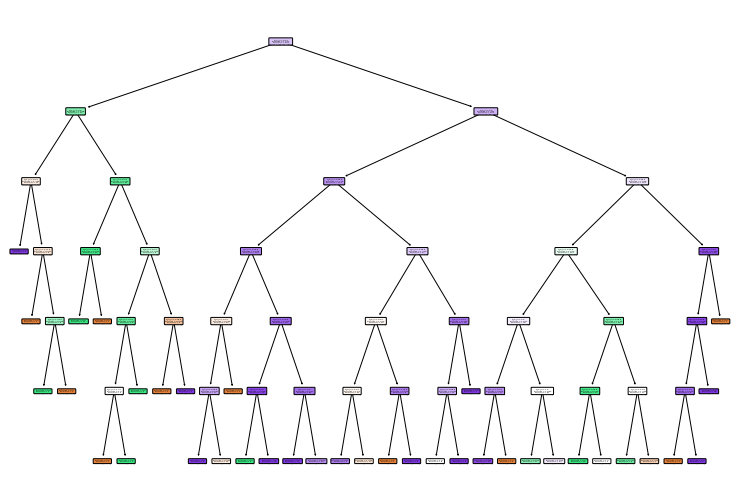

In [81]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(13,9))
plot_tree(decision_tree = dt_model_1,filled=True,rounded=True)
plt.show()

### Model Prediction

In [82]:
y_pred_train_1 = dt_model_1.predict(X_train)

### Evaluation:

#### Training Data

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train_1))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train_1))

Accuracy Score :  0.790625
-------------------------------------------
Confusion Matrix:
 [[ 47   6  30]
 [  8  63  10]
 [ 12   1 143]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.57      0.63        83
           1       0.90      0.78      0.83        81
           2       0.78      0.92      0.84       156

    accuracy                           0.79       320
   macro avg       0.79      0.75      0.77       320
weighted avg       0.79      0.79      0.79       320



#### Testing data

In [84]:
y_pred_test_1 = dt_model_1.predict(X_test)

#### Accuracy score

In [85]:
accuracy_score(y_test,y_pred_test_1)

0.55

###  observations:

### 1. with this classsification analysis this much accuracy we get 

### 2. to increase the accuracy we need to apply the *ENSEMBLE TECHNIQUES*